<h1>template notebook</h1>

import libraries

In [1]:
import numpy as np #https://numpy.org/
import pandas as pd #https://pandas.pydata.org/
import matplotlib.pyplot as plt #https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html

CFG

In [2]:
class CFG():
    input_path="../input/tabular-playground-series-mar-2021/"
    debug=False

    seed=42


In [3]:
target_columns=['target']
def feature_columns(df):
    return df.drop(columns=target_columns).columns
def numerical_columns(df):
    return df[feature_columns(df)].select_dtypes(include=['int64','float64']).columns
def categorical_columns(df):
    return df[feature_columns(df)].select_dtypes(exclude=['int64','float64']).columns

In [4]:
class Color:
    BLACK     = '\033[30m'
    RED       = '\033[31m'
    GREEN     = '\033[32m'
    YELLOW    = '\033[33m'
    BLUE      = '\033[34m'
    PURPLE    = '\033[35m'
    CYAN      = '\033[36m'
    WHITE     = '\033[37m'
    END       = '\033[0m'
    BOLD      = '\038[1m'
    UNDERLINE = '\033[4m'
    INVISIBLE = '\033[08m'
    REVERCE   = '\033[07m'

utility functions

In [5]:
def what_is(obj):
    print("type:",type(obj))
    print("-"*40+"help"+"-"*40)
    print(help(obj))
    print("-"*40+"dir"+"-"*40)
    print(dir(obj))


import pandas_profiling
def simple_eda(df):
    """
    simple_eda
    """
    print("-"*40+"EDA"+"-"*40)
    print("type:",type(df))
    print("-"*40+"head"+"-"*40)
    display(df.head())
    print("-"*40+"describe"+"-"*40)
    display(df.describe())
    print("-"*40+"info"+"-"*40)
    print(df.info())

    #display(df.profile_report())

read data

In [6]:
train=pd.read_csv(CFG.input_path+"train.csv",index_col='id')
test=pd.read_csv(CFG.input_path+"test.csv",index_col='id')
sample_submission=pd.read_csv(CFG.input_path+"sample_submission.csv",index_col='id')

if CFG.debug:
    train=train[:len(train)//100]


df=pd.concat([train,test])

simple_eda

In [7]:
simple_eda(train)

----------------------------------------EDA----------------------------------------
type: <class 'pandas.core.frame.DataFrame'>
----------------------------------------head----------------------------------------


,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,target
id,,,,,,,,,,,,,,,,,,,,,
0,A,I,A,B,B,BI,A,S,Q,A,...,0.759439,0.795549,0.681917,0.621672,0.592184,0.791921,0.815254,0.965006,0.665915,0
1,A,I,A,A,E,BI,K,W,AD,F,...,0.386385,0.541366,0.388982,0.357778,0.600044,0.408701,0.399353,0.927406,0.493729,0
2,A,K,A,A,E,BI,A,E,BM,L,...,0.343255,0.616352,0.793687,0.552877,0.352113,0.388835,0.412303,0.292696,0.549452,0
3,A,K,A,C,E,BI,A,Y,AD,F,...,0.831147,0.807807,0.800032,0.619147,0.221789,0.897617,0.633669,0.760318,0.934242,0
4,A,I,G,B,E,BI,C,G,Q,A,...,0.338818,0.277308,0.610578,0.128291,0.578764,0.279167,0.351103,0.357084,0.328960,1


----------------------------------------describe----------------------------------------


,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,target
count,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000
mean,0.504749,0.494073,0.516632,0.474235,0.504848,0.502257,0.488229,0.501739,0.488074,0.469496,0.508230,0.264870
std,0.206788,0.213037,0.214851,0.216636,0.227474,0.241243,0.211335,0.203496,0.179048,0.194516,0.203393,0.441265
min,-0.049562,0.084480,0.094493,-0.045316,0.168071,-0.036379,0.005199,0.090901,0.024139,0.214866,0.097789,0.000000
25%,0.344985,0.317363,0.326047,0.292249,0.279303,0.276442,0.323914,0.353054,0.358915,0.309934,0.368312,0.000000
50%,0.479650,0.463170,0.471247,0.387564,0.479858,0.554768,0.518089,0.435404,0.410908,0.407477,0.446576,0.000000
75%,0.637657,0.693992,0.704625,0.644950,0.725779,0.735225,0.608537,0.642023,0.612725,0.586793,0.581957,1.000000
max,1.004559,1.009958,1.016600,0.952187,0.858578,0.853022,0.966553,1.035818,1.055885,1.005652,1.011331,1.000000


----------------------------------------info----------------------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 300000 entries, 0 to 499999
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   cat0    300000 non-null  object 
 1   cat1    300000 non-null  object 
 2   cat2    300000 non-null  object 
 3   cat3    300000 non-null  object 
 4   cat4    300000 non-null  object 
 5   cat5    300000 non-null  object 
 6   cat6    300000 non-null  object 
 7   cat7    300000 non-null  object 
 8   cat8    300000 non-null  object 
 9   cat9    300000 non-null  object 
 10  cat10   300000 non-null  object 
 11  cat11   300000 non-null  object 
 12  cat12   300000 non-null  object 
 13  cat13   300000 non-null  object 
 14  cat14   300000 non-null  object 
 15  cat15   300000 non-null  object 
 16  cat16   300000 non-null  object 
 17  cat17   300000 non-null  object 
 18  cat18   300000 non-null  object 
 19  c

data cleaning

In [8]:
df['cat1'] = df['cat1'].apply(lambda x: x if x in ['I', 'F', 'K', 'L','H'] else 'Z')
df['cat2'] = df['cat2'].apply(lambda x: x if x in ['A', 'C', 'D', 'G','Q'] else 'Z')
df['cat3'] = df['cat3'].apply(lambda x: x if x in ['A', 'B', 'C', 'D','E'] else 'Z')
df['cat4'] = df['cat4'].apply(lambda x: x if x in ['E', 'F', 'G', 'D','H'] else 'Z')
df['cat5'] = df['cat5'].apply(lambda x: x if x in ['BI', 'AB', 'BU', 'K','G'] else 'Z')
df['cat6'] = df['cat6'].apply(lambda x: x if x in ['A', 'C', 'E', 'G','I'] else 'Z')
df['cat7'] = df['cat7'].apply(lambda x: x if x in ['AH', 'E', 'AS', 'AN','J'] else 'Z')

# df['cont6*cont0'] = df['cont6'] * df['cont0']
# df['cont6*cont3'] = df['cont6'] * df['cont3']
# df['cont6*cont7'] = df['cont6'] * df['cont7']
# df['cont6*cont10'] = df['cont6'] * df['cont10']
df=df.drop(columns=['cont0','cont4','cont7','cont9','cont10'])



In [9]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca.fit(df[numerical_columns(df)])

# print("--- explained_variance_ratio_ ---")
# print(pca.explained_variance_ratio_)
# print("--- components ---")
# print(pca.components_)
# print("--- mean ---")
# print(pca.mean_)
# print("--- covariance ---")
# print(pca.get_covariance())

result = pca.transform(df[numerical_columns])
result=pd.DataFrame(result)
print(result)


               0         1         2
0       0.607247  0.091752 -0.080963
1      -0.220798  0.019826  0.014116
2      -0.205211  0.087878 -0.230587
3       0.443588  0.316285 -0.224563
4      -0.424061  0.027114  0.299719
...          ...       ...       ...
499995 -0.145427 -0.204953 -0.079476
499996  0.146939  0.238371 -0.180566
499997  0.498105 -0.221329  0.359037
499998  0.409121 -0.091433  0.075248
499999 -0.164825 -0.061882 -0.143437

[500000 rows x 3 columns]


In [10]:
# color = df.target[:len(train)].map({0:'b', 1:'r'})
# result.plot.scatter(x=1,y=2,c=color)

In [11]:
# df=df.drop(columns=numerical_columns(df))
# df=pd.concat([df,result],axis=1)

In [12]:
df.head()

,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cat16,cat17,cat18,cont1,cont2,cont3,cont5,cont6,cont8,target
id,,,,,,,,,,,,,,,,,,,,,
0,A,I,A,B,Z,BI,A,Z,Q,A,...,D,D,B,0.855349,0.759439,0.795549,0.621672,0.592184,0.815254,0.0
1,A,I,A,A,E,BI,Z,Z,AD,F,...,B,D,B,0.328929,0.386385,0.541366,0.357778,0.600044,0.399353,0.0
2,A,K,A,A,E,BI,A,E,BM,L,...,D,D,B,0.322749,0.343255,0.616352,0.552877,0.352113,0.412303,0.0
3,A,K,A,C,E,BI,A,Z,AD,F,...,D,D,B,0.707663,0.831147,0.807807,0.619147,0.221789,0.633669,0.0
4,A,I,G,B,E,BI,C,Z,Q,A,...,B,D,B,0.274514,0.338818,0.277308,0.128291,0.578764,0.351103,1.0


In [13]:
train=df[:len(train)].copy()
test=df[len(train):].copy()

In [14]:
numerical_columns(train)

Index(['cont1', 'cont2', 'cont3', 'cont5', 'cont6', 'cont8'], dtype='object')

feature engineering

In [15]:
from sklearn.preprocessing import LabelEncoder

print(categorical_columns(df))
for col in categorical_columns(df):
    le = LabelEncoder()
    le.fit(df[col])

    train[col]=le.transform(train[col])
    test[col]=le.transform(test[col])


Index(['cat0', 'cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7', 'cat8',
       'cat9', 'cat10', 'cat11', 'cat12', 'cat13', 'cat14', 'cat15', 'cat16',
       'cat17', 'cat18'],
      dtype='object')


model

In [16]:
train.head()

,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cat16,cat17,cat18,cont1,cont2,cont3,cont5,cont6,cont8,target
id,,,,,,,,,,,,,,,,,,,,,
0,0,2,0,1,5,1,0,5,54,0,...,3,3,1,0.855349,0.759439,0.795549,0.621672,0.592184,0.815254,0.0
1,0,2,0,0,1,1,5,5,3,5,...,1,3,1,0.328929,0.386385,0.541366,0.357778,0.600044,0.399353,0.0
2,0,3,0,0,1,1,0,3,38,9,...,3,3,1,0.322749,0.343255,0.616352,0.552877,0.352113,0.412303,0.0
3,0,3,0,2,1,1,0,5,3,5,...,3,3,1,0.707663,0.831147,0.807807,0.619147,0.221789,0.633669,0.0
4,0,2,3,1,1,1,1,5,54,0,...,1,3,1,0.274514,0.338818,0.277308,0.128291,0.578764,0.351103,1.0


eval

In [17]:
from sklearn.metrics import roc_curve,auc
def get_score(y_pred,y):

    fpr, tpr, thresholds = roc_curve(y, y_pred)
    score = auc(fpr, tpr)
    
    # ROC曲線をプロット
    plt.plot(fpr, tpr, label='ROC curve (area = %.2f)'%score)
    plt.legend()
    plt.title('ROC curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.grid(True)

    return score

In [18]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# from tqdm.notebook import tqdm #peogress bar

def cross_validation(X,y,model,test_X=None,NUM_FOLDS=5):

    kf = KFold(n_splits=NUM_FOLDS, shuffle=True,random_state=0)
    
    scores=[]
    test_preds = [0]*len(test_X)
        
    for fold_cnt, (tr_idx, val_idx) in enumerate(kf.split(X,y)):
            
        #tqdm(enumerate(kf.split(x, y))):
            
        print(f"FOLD:{fold_cnt}")
        #print(tr_idx,val_idx)

        tr_x, va_x = X.iloc[tr_idx][:], X.iloc[val_idx][:]
        tr_y, va_y = y.iloc[tr_idx][:], y.iloc[val_idx][:]

        tr_y=np.ravel(tr_y)#reshape 1d

        model.fit(tr_x, tr_y)

        #temp_oof = model.predict(va_x)
        pre=model.predict(va_x)

        #pre=[x>0.5 for x in pre]
        score=get_score(pre, va_y)
        print(Color.GREEN,score,Color.END,sep='')
        scores.append(score)

        test_preds += model.predict(test_X)/NUM_FOLDS
    
    print("ave:",np.average(scores))
    #return np.average(scores)
    return test_preds

FOLD:0
0.8798832740219371
FOLD:1
0.8835020705096547
FOLD:2
0.8808891463605812
FOLD:3
0.8831173374581176
FOLD:4
0.8816648538690455
ave: 0.8818113364438671


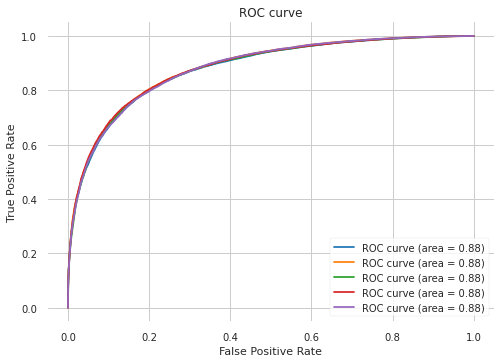

In [19]:

from xgboost import XGBRegressor


xgb_params = {
    'booster':'gbtree',
    'n_estimators':2000,
    'max_depth':4, 
    'eta':0.008,
    'gamma':3.5,
    'objective':'reg:squarederror',
    'verbosity':0,
    'subsample':0.75,
    'colsample_bytree':0.35,
    'reg_lambda':0.23,
    'reg_alpha':0.52,
    'scale_pos_weight':1,
    #'eval_metric':'auc',
    'seed': CFG.seed,
    # 'tree_method':'gpu_hist',
    # 'gpu_id':0
}
model=XGBRegressor(**xgb_params)

train[target_columns].head()
xgb_y_pred=cross_validation(train[feature_columns(train)],train[target_columns],model,test[feature_columns(test)])

FOLD:0
0.8634624137190579
FOLD:1
0.8673435120446944
FOLD:2
0.8641400945867364
FOLD:3
0.8664299045494768
FOLD:4
0.8648232339822904
ave: 0.8652398317764511


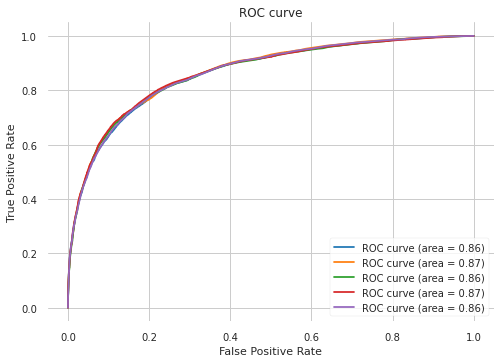

In [20]:
from sklearn.ensemble import RandomForestRegressor
random_forest_params = {
    'n_estimators':100,
    #'criterion':'mae',
    'max_depth':6,
    'min_samples_split':5,

}
model=RandomForestRegressor(**random_forest_params)
rf_y_pred=cross_validation(train[feature_columns],train[target_columns],model,test[feature_columns])

FOLD:0
0.8833750029725687
FOLD:1
0.8868926651071903
FOLD:2
0.8839963225303464
FOLD:3
0.8866424142861274
FOLD:4
0.8852707337743878
ave: 0.8852354277341241


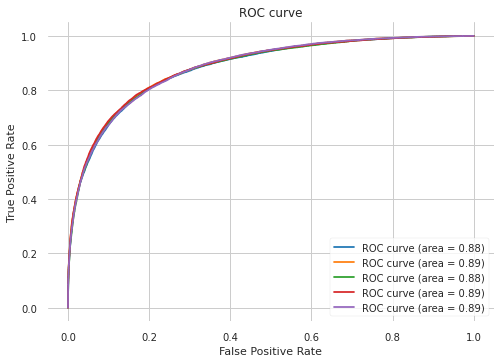

In [21]:
from lightgbm import LGBMRegressor

lgbm_params = {
    'booster':'gbtree',
    'n_estimators':2000,
    'max_depth':100, 
    'eta':0.08,
    'gamma':3.5,
    'objective':'reg:squarederror',
    'verbosity':0,
    'subsample':0.75,
    # 'colsample_bytree':0.35,
    # 'reg_lambda':0.23,
    'reg_alpha':0.52,
    'scale_pos_weight':1,
    'eval_metric':'auc',
    'seed': 42,
    'tree_method':'gpu_hist',
    'gpu_id':0
}
model=LGBMRegressor()#(**lgbm_params)
lgbm_y_pred=cross_validation(train[feature_columns],train[target_columns],model,test[feature_columns])

optuna

In [22]:
# #import optuna

# # Define an objective function to be minimized.
# def objective(trial):

#     # Invoke suggest methods of a Trial object to generate hyperparameters.
#     regressor_name = trial.suggest_categorical('classifier', ['xgb', 'RandomForest'])
#     if regressor_name == 'xgb':
#         n_estimators = trial.suggest_int('n_estimators', 2,20000)
#         max_depth = trial.suggest_int('max_depth', 2,10)
#         eta = trial.suggest_float('eta', 0.000001,1)
#         gamma = trial.suggest_float('gamma', 1,10)
#         regressor_obj = XGBRegressor(
#             n_estimators=n_estimators,
#             max_depth=max_depth,
#             eta=eta,
#             gamma=gamma,
#             #eval_metric='auc',
#         )
#     else:
#         n_estimators = trial.suggest_int('n_estimators', 2, 32)
#         regressor_obj = RandomForestRegressor(n_estimators=n_estimators)

#     # X, y = sklearn.datasets.load_boston(return_X_y=True)
#     # X_train, X_val, y_train, y_val = sklearn.model_selection.train_test_split(X, y, random_state=0)

#     # regressor_obj.fit(X_train, y_train)
#     # y_pred = regressor_obj.predict(X_val)

#     # error = sklearn.metrics.mean_squared_error(y_val, y_pred)

#     #return error  # An objective value linked with the Trial object.
#     return cross_validation(train[feature_columns],train[target_columns],regressor_obj)

# study = optuna.create_study(direction='maximize')  # Create a new study.
# study.optimize(objective, n_trials=100)  # Invoke optimization of the objective function.

In [23]:
# print(study.best_params)
# print(study.best_value)

In [24]:
submission=pd.DataFrame(columns=['id','target'])

submission.id=test.index
submission.target=(xgb_y_pred*5+rf_y_pred*2+lgbm_y_pred)/8
submission.to_csv("submission.csv",index=False)

submission.head()


,id,target
0,5,0.104615
1,6,0.543298
2,8,0.093882
3,9,0.132026
4,11,0.146059
